# Exercise sheet 8
# Back again to the Kalahari

For this exercise, you will need to load the dataset (Howell1) from the rethinking package that we discussed already
in the class and in the third exercise sheet. Split the data in two equally sized (272 rows each) data frames. These
will constitute your training and testing sets.

In [3]:
library(rethinking)
data(Howell1)
d <- Howell1
d$age <- scale(d$age)
set.seed(1000)
i <- sample(1:nrow(d), size = nrow(d) / 2)
d1 <- d[i, ]
d2 <- d[-i, ]

summary(d1)
summary(d2)

     height           weight              age.V1             male       
 Min.   : 55.88   Min.   : 4.848   Min.   :-1.4143997   Min.   :0.0000  
 1st Qu.:121.92   1st Qu.:20.560   1st Qu.:-0.9323997   1st Qu.:0.0000  
 Median :147.96   Median :39.335   Median :-0.1611998   Median :0.0000  
 Mean   :137.20   Mean   :34.893   Mean   :-0.0704881   Mean   :0.4853  
 3rd Qu.:157.48   3rd Qu.:46.330   3rd Qu.: 0.6220502   3rd Qu.:1.0000  
 Max.   :179.07   Max.   :62.993   Max.   : 2.5862002   Max.   :1.0000  

     height           weight              age.V1             male       
 Min.   : 53.98   Min.   : 4.252   Min.   :-1.4143997   Min.   :0.0000  
 1st Qu.:129.54   1st Qu.:24.515   1st Qu.:-0.8359998   1st Qu.:0.0000  
 Median :149.22   Median :40.837   Median :-0.0165998   Median :0.0000  
 Mean   :139.32   Mean   :36.328   Mean   : 0.0704881   Mean   :0.4596  
 3rd Qu.:157.48   3rd Qu.:47.422   3rd Qu.: 0.7064002   3rd Qu.:1.0000  
 Max.   :171.45   Max.   :59.761   Max.   : 2.8272002   Max.   :1.0000  

## Exercise 1

Build a linear model of the height vs. age. Do the same using polynomials up to 6th degree. Fit these models to the d1 dataset using the map function, this is a fit to your training sample.

In [4]:
model1 <- map(
	alist(
		height ~ dnorm(mu, sigma),
		mu <- a + b * age,
		a ~ dnorm(135, 50),
		b ~ dnorm(0, 20),
		sigma ~ dunif(0, 20)
	),
	data = d1
)

post1 <- extract.samples(model1)
mu.link1 <- function(age) post1$a + post1$b * age

In [5]:
# Defining the weight grid
age.seq <- seq(from = -1.50, to = 2.9, by = 0.01)

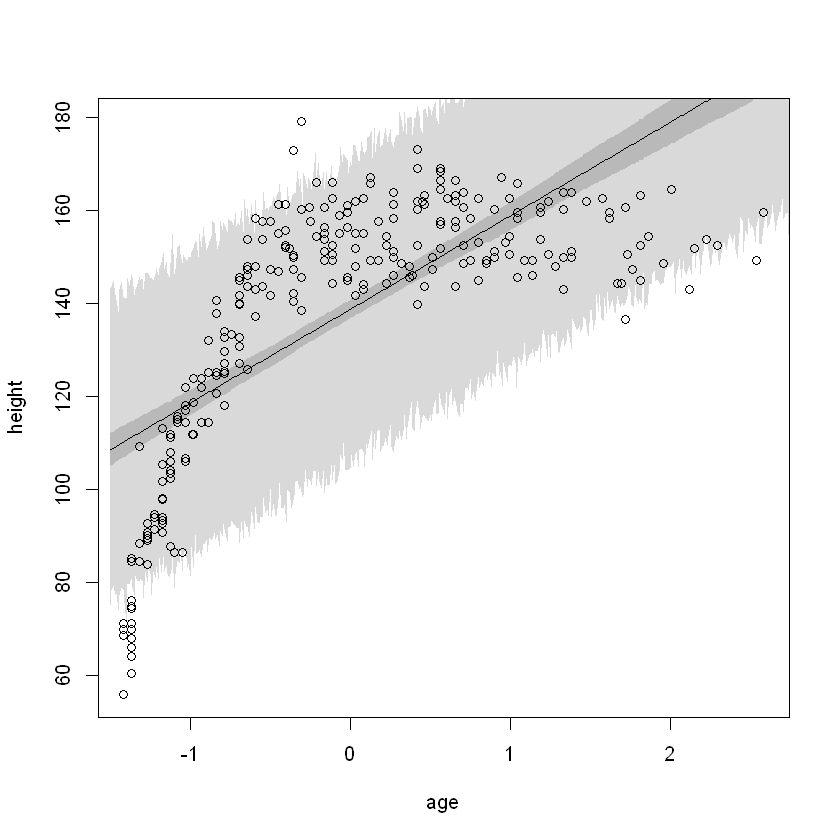

In [6]:
# This function 
plot_with_shade <- function(output, mu.link) {
# For each weight value we calculate a 91 percent credible interval
mu <- sapply(age.seq, mu.link)
mu.mean <- apply(mu, 2, mean)
mu.HPDI <- apply(mu, 2, HPDI, prob = 0.91)

plot(height ~ age, d1)
lines(age.seq, mu.mean)
shade(mu.HPDI, age.seq)

# We calculate the 91 percent credible interval of the height variables by taking into account the uncertainty of the slope and the standard deviation
sim.height <- sim(output, data = list(age = age.seq))
height.HPDI <- apply(sim.height, 2, HPDI, prob = 0.91)
shade(height.HPDI, age.seq)
}

plot_with_shade(model1, mu.link1)

In [7]:
model2 <- map(
	alist(
		height ~ dnorm(mu, sigma),
		mu <- a + b * age + c * age * age,
		a ~ dnorm(135, 50),
		b ~ dnorm(0, 20),
		c ~ dnorm(0, 20),
		sigma ~ dunif(0, 20)
	),
	data = d1
)

post2 <- extract.samples(model2)
mu.link2 <- function(age) post2$a + post2$b * age + post2$c * age * age

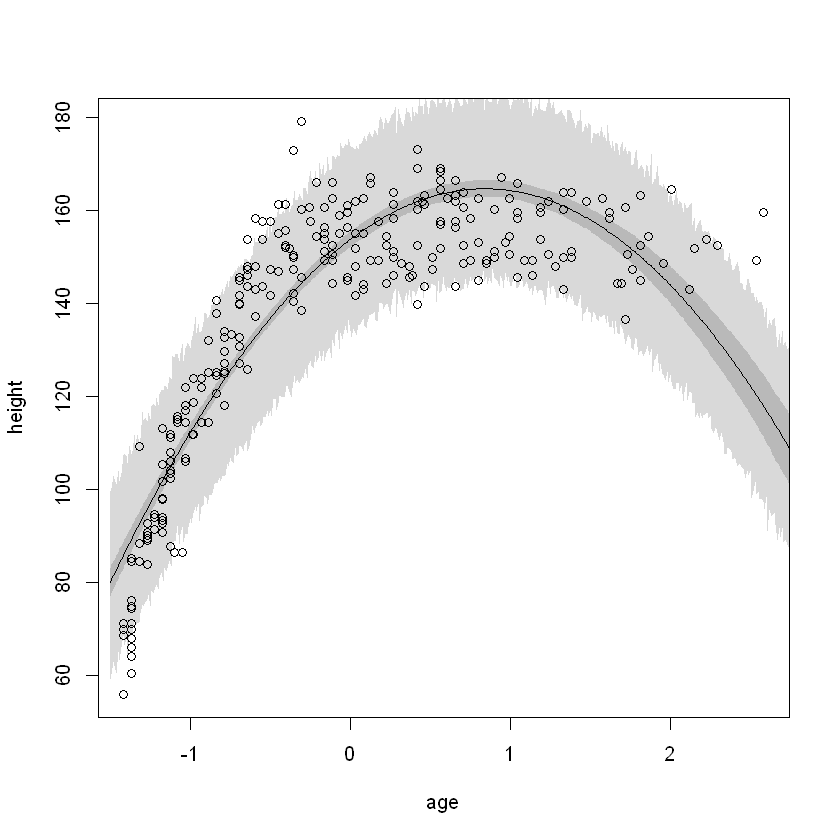

In [8]:
plot_with_shade(model2, mu.link2)

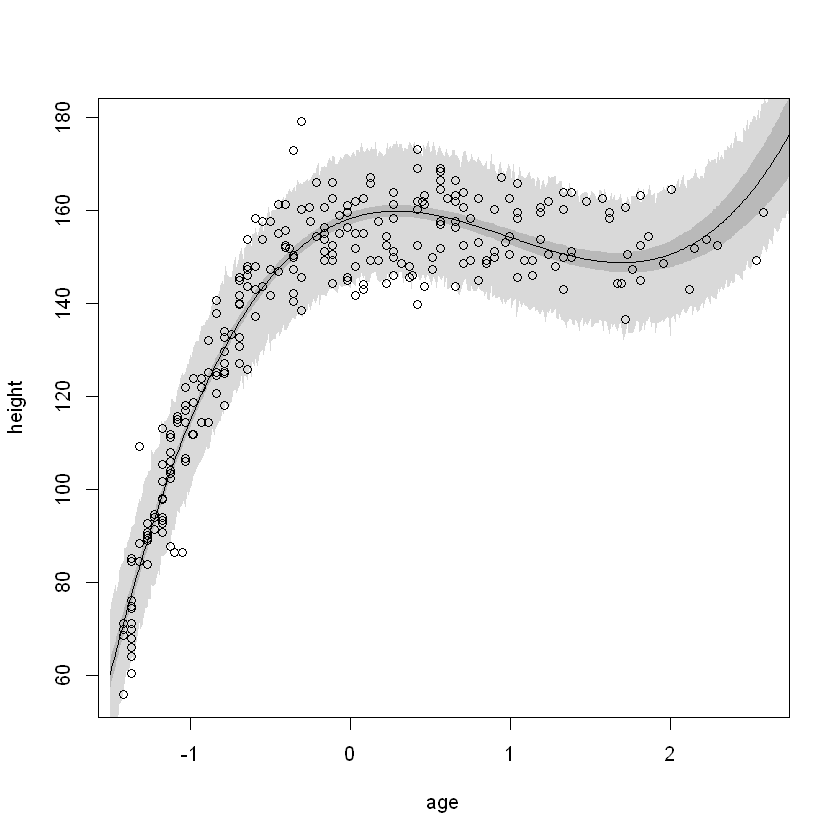

In [9]:
model3 <- map(
	alist(
		height ~ dnorm(mu, sigma),
		mu <- a + b * age + c * age * age + d * age * age * age,
		a ~ dnorm(135, 50),
		b ~ dnorm(0, 20),
		c ~ dnorm(0, 20),
		d ~ dnorm(0, 20),
		sigma ~ dunif(0, 20)
	),
	data = d1
)

post3 <- extract.samples(model3)
mu.link3 <- function(age) post3$a + post3$b * age + post3$c * age * age + post3$d * age * age * age

plot_with_shade(model3, mu.link3)

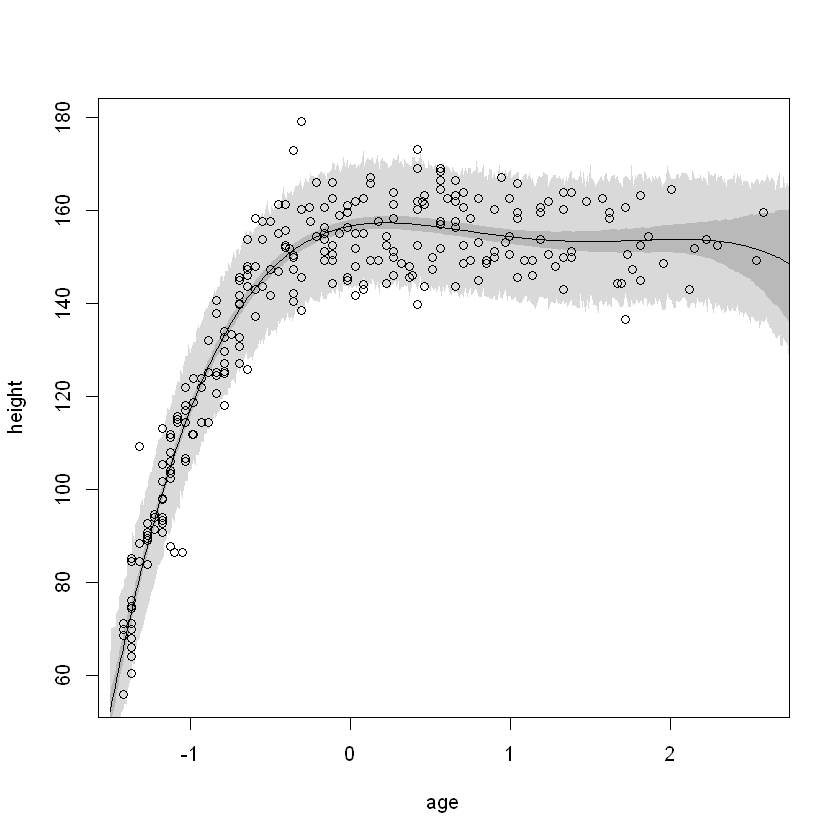

In [10]:
model4 <- map(
	alist(
		height ~ dnorm(mu, sigma),
		mu <- a + b * age + c * age * age + d * age * age * age + e * age * age * age * age,
		a ~ dnorm(135, 50),
		b ~ dnorm(0, 20),
		c ~ dnorm(0, 20),
		d ~ dnorm(0, 20),
		e ~ dnorm(0, 20),
		sigma ~ dunif(0, 20)
	),
	data = d1
)

post4 <- extract.samples(model4)
mu.link4 <- function(age) post4$a + post4$b * age + post4$c * age * age + post4$d * age * age * age + post4$e * age * age * age * age

plot_with_shade(model4, mu.link4)

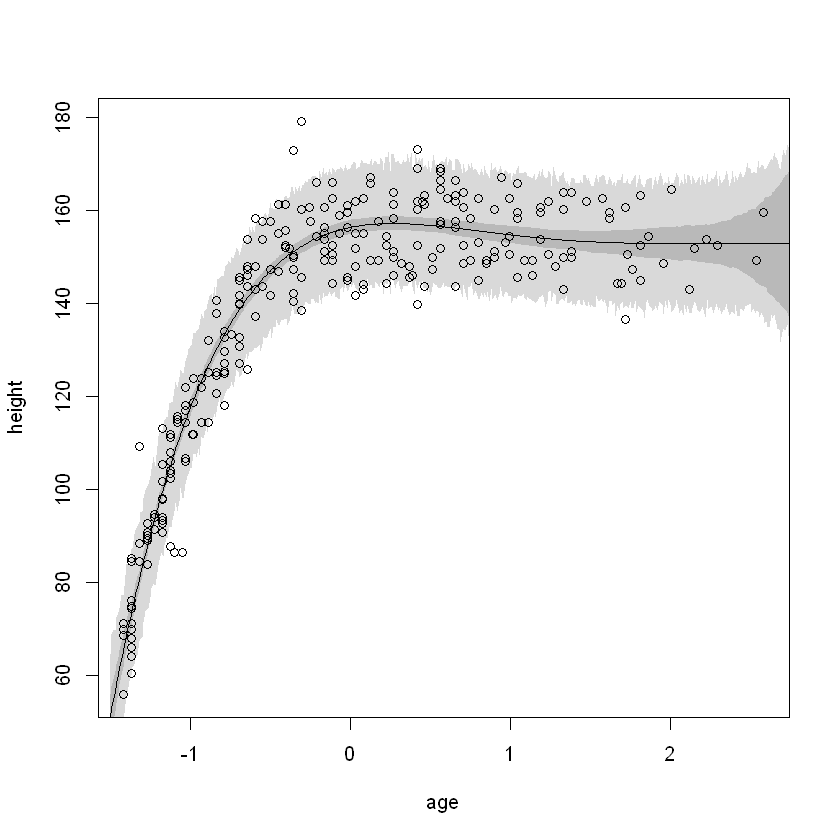

In [11]:
model5 <- map(
	alist(
		height ~ dnorm(mu, sigma),
		mu <- a + b * age + c * age * age + d * age * age * age + e * age * age * age * age + f * age * age * age * age * age,
		a ~ dnorm(135, 50),
		b ~ dnorm(0, 20),
		c ~ dnorm(0, 20),
		d ~ dnorm(0, 20),
		e ~ dnorm(0, 20),
		f ~ dnorm(0, 20),
		sigma ~ dunif(0, 20)
	),
	data = d1
)

post5 <- extract.samples(model5)
mu.link5 <- function(age) post5$a + post5$b * age + post5$c * age * age + post5$d * age * age * age + post5$e * age * age * age * age + post5$f * age * age * age * age * age

plot_with_shade(model5, mu.link5)

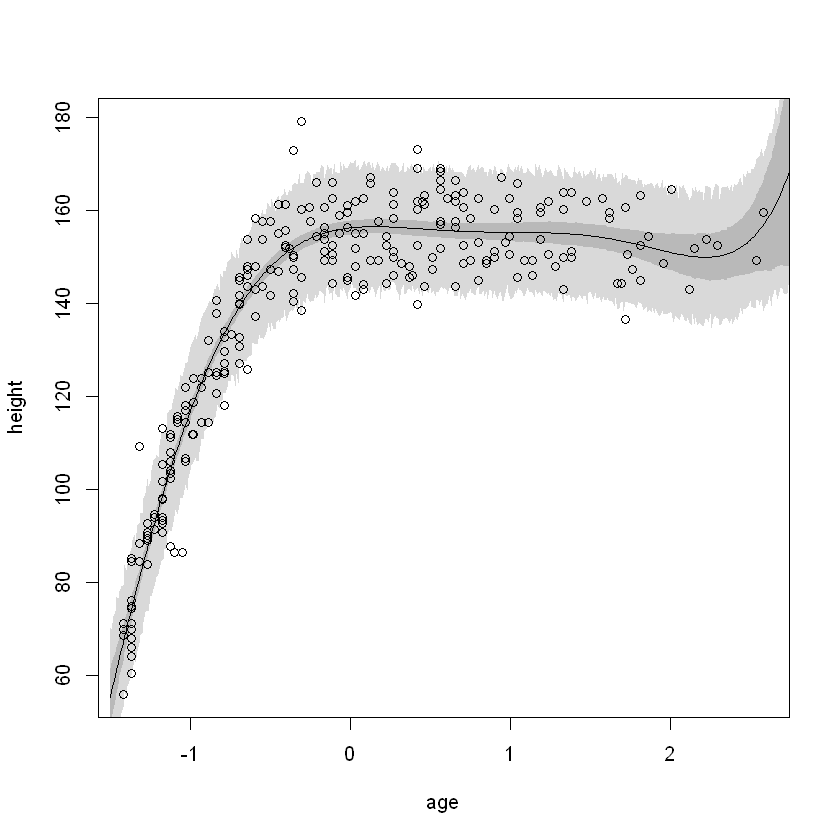

In [12]:
model6 <- map(
	alist(
		height ~ dnorm(mu, sigma),
		mu <- a + b * age + c * age * age + d * age * age * age + e * age * age * age * age + f * age * age * age * age * age + g * age * age * age * age * age * age,
		a ~ dnorm(135, 50),
		b ~ dnorm(0, 20),
		c ~ dnorm(0, 20),
		d ~ dnorm(0, 20),
		e ~ dnorm(0, 20),
		f ~ dnorm(0, 20),
		g ~ dnorm(0, 20),
		sigma ~ dunif(0, 20)
	),
	data = d1
)

post6 <- extract.samples(model6)
mu.link6 <- function(age) post6$a + post6$b * age + post6$c * age * age + post6$d * age * age * age + post6$e * age * age * age * age + post6$f * age * age * age * age * age + post6$g * age * age * age * age * age * age

plot_with_shade(model6, mu.link6)

## Exercise 2

Compare all 6 models from exercise 1 using the WAIC function. Comment and critique your findings, especially regarding the predictions. You can use tables and figures to illustrate your results.

In [13]:
height.model <- compare(model1, model2, model3, model4, model5, model6)
height.model

,WAIC,SE,dWAIC,dSE,pWAIC,weight
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
model6,1908.002,26.87753,0.0000000,NA,7.823029,4.220692e-01
model4,1908.169,26.88461,0.1660979,3.525531,6.079774,3.884329e-01
model5,1909.604,27.23252,1.6015887,3.423603,6.857307,1.894973e-01
model3,1935.070,24.75076,27.0675373,11.839068,5.683387,5.594260e-07
model2,2122.918,25.78832,214.9158630,28.611298,6.217510,9.057263e-48
model1,2393.421,21.78845,485.4190152,30.978512,3.509803,1.651900e-106


We see that the 4th, 5th and the 6th model are equally good, and occam's razor prescribes that we should use the least complicated model.

## Exercise 3

Compute the test-sample (d2 dataset) deviance for each of the 6 models. You will need to use the map coefficient estimates and sum the log likelihoods. Compare these deviances to the WAIC values computed in exercise 2 (use figures to illustrate the differences). Did WAIC do a good job in predicting the out-of-sample deviance?

In [14]:
coeffs1 <- coef(model1)
coeffs2 <- coef(model2)
coeffs3 <- coef(model3)
coeffs4 <- coef(model4)
coeffs5 <- coef(model5)
coeffs6 <- coef(model6)

sigma1 <- coeffs1[3]
sigma2 <- coeffs2[4]
sigma3 <- coeffs3[5]
sigma4 <- coeffs4[6]
sigma5 <- coeffs5[7]
sigma6 <- coeffs6[8]

dataset <- d2

test_heights1 <- coeffs1[1] + coeffs1[2] * dataset$age
test_heights2 <- coeffs2[1] + coeffs2[2] * dataset$age + coeffs2[3] * dataset$age * dataset$age
test_heights3 <- coeffs3[1] + coeffs3[2] * dataset$age + coeffs3[3] * dataset$age * dataset$age + coeffs3[4] * dataset$age * dataset$age * dataset$age
test_heights4 <- coeffs4[1] + coeffs4[2] * dataset$age + coeffs4[3] * dataset$age * dataset$age + coeffs4[4] * dataset$age * dataset$age * dataset$age + coeffs4[5] * dataset$age * dataset$age * dataset$age * dataset$age
test_heights5 <- coeffs5[1] + coeffs5[2] * dataset$age + coeffs5[3] * dataset$age * dataset$age + coeffs5[4] * dataset$age * dataset$age * dataset$age + coeffs5[5] * dataset$age * dataset$age * dataset$age * dataset$age + coeffs5[6] * dataset$age * dataset$age * dataset$age * dataset$age * dataset$age
test_heights6 <- coeffs6[1] + coeffs6[2] * dataset$age + coeffs6[3] * dataset$age * dataset$age + coeffs6[4] * dataset$age * dataset$age * dataset$age + coeffs6[5] * dataset$age * dataset$age * dataset$age * dataset$age + coeffs5[6] * dataset$age * dataset$age * dataset$age * dataset$age * dataset$age + coeffs6[7] * dataset$age * dataset$age * dataset$age * dataset$age * dataset$age * dataset$age

dataset <- d1

train_heights1 <- coeffs1[1] + coeffs1[2] * dataset$age
train_heights2 <- coeffs2[1] + coeffs2[2] * dataset$age + coeffs2[3] * dataset$age * dataset$age
train_heights3 <- coeffs3[1] + coeffs3[2] * dataset$age + coeffs3[3] * dataset$age * dataset$age + coeffs3[4] * dataset$age * dataset$age * dataset$age
train_heights4 <- coeffs4[1] + coeffs4[2] * dataset$age + coeffs4[3] * dataset$age * dataset$age + coeffs4[4] * dataset$age * dataset$age * dataset$age + coeffs4[5] * dataset$age * dataset$age * dataset$age * dataset$age
train_heights5 <- coeffs5[1] + coeffs5[2] * dataset$age + coeffs5[3] * dataset$age * dataset$age + coeffs5[4] * dataset$age * dataset$age * dataset$age + coeffs5[5] * dataset$age * dataset$age * dataset$age * dataset$age + coeffs5[6] * dataset$age * dataset$age * dataset$age * dataset$age * dataset$age
train_heights6 <- coeffs6[1] + coeffs6[2] * dataset$age + coeffs6[3] * dataset$age * dataset$age + coeffs6[4] * dataset$age * dataset$age * dataset$age + coeffs6[5] * dataset$age * dataset$age * dataset$age * dataset$age + coeffs5[6] * dataset$age * dataset$age * dataset$age * dataset$age * dataset$age + coeffs6[7] * dataset$age * dataset$age * dataset$age * dataset$age * dataset$age * dataset$age

dtest <- d2
dtrain <- d1

In [15]:
my_deviance <- function(data, mean, stdv) {
	dev <- (-2) * sum(dnorm(data$height, mean = mean, sd = stdv, log = TRUE))
	return(dev)
}

[1] 2386.682 2112.139 1923.962 1895.694 1895.349 5340.665

[1]  2426.814  2173.042  1954.263  1892.921  1893.572 12007.161

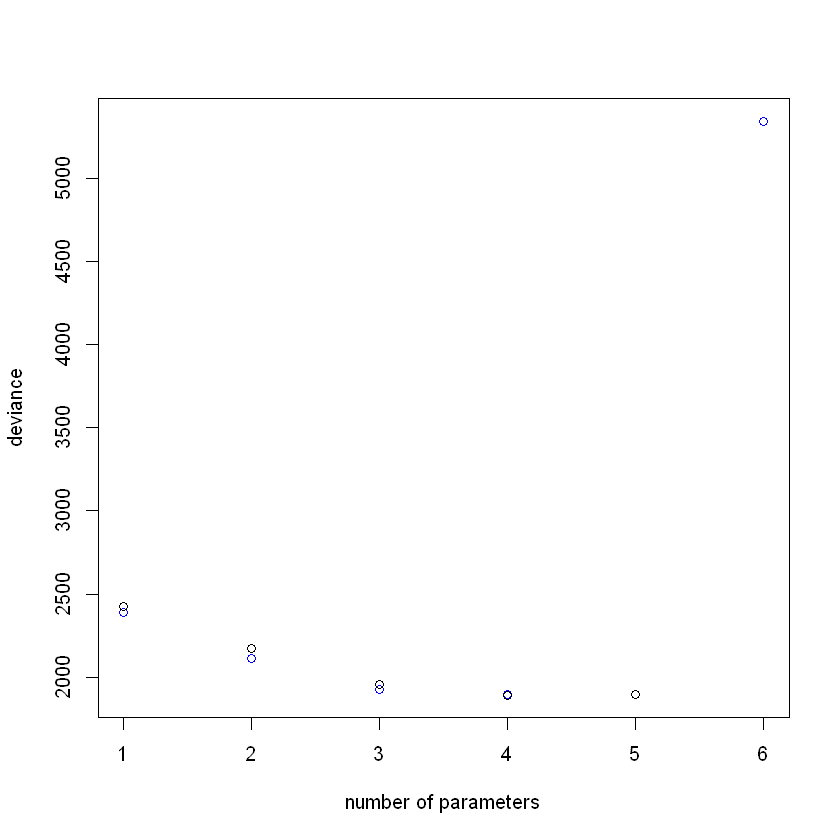

In [16]:
dev_train1 <- my_deviance(dtrain, train_heights1, sigma1)
dev_test1 <- my_deviance(dtest, test_heights1, sigma1)
dev_train2 <- my_deviance(dtrain, train_heights2, sigma2)
dev_test2 <- my_deviance(dtest, test_heights2, sigma2)
dev_train3 <- my_deviance(dtrain, train_heights3, sigma3)
dev_test3 <- my_deviance(dtest, test_heights3, sigma3)
dev_train4 <- my_deviance(dtrain, train_heights4, sigma4)
dev_test4 <- my_deviance(dtest, test_heights4, sigma4)
dev_train5 <- my_deviance(dtrain, train_heights5, sigma5)
dev_test5 <- my_deviance(dtest, test_heights5, sigma5)
dev_train6 <- my_deviance(dtrain, train_heights6, sigma6)
dev_test6 <- my_deviance(dtest, test_heights6, sigma6)

dev_train_ary <- c(dev_train1, dev_train2, dev_train3, dev_train4, dev_train5, dev_train6)
dev_test_ary <- c(dev_test1, dev_test2, dev_test3, dev_test4, dev_test5, dev_test6)
parameters_ary <- c(2, 3, 4, 5, 6, 7)

dev_train_ary
dev_test_ary

plot(parameters_ary, dev_train_ary, col = "blue", xlab = "number of parameters", ylab = "deviance")
points(parameters_ary, dev_test_ary)

The test deviance seems to agree to the findings we made in exercise 2, although it seems to reject model 6, which might be because of a calculation error.